<a href="https://colab.research.google.com/github/hosseinghafourishoreh/Google-Colab/blob/main/Graz_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

!pip install contextily matplotlib_scalebar mapclassify
!pip install osmnx momepy
!pip install mapclassify
!pip install --upgrade osmnx momepy contextily matplotlib_scalebar mapclassify

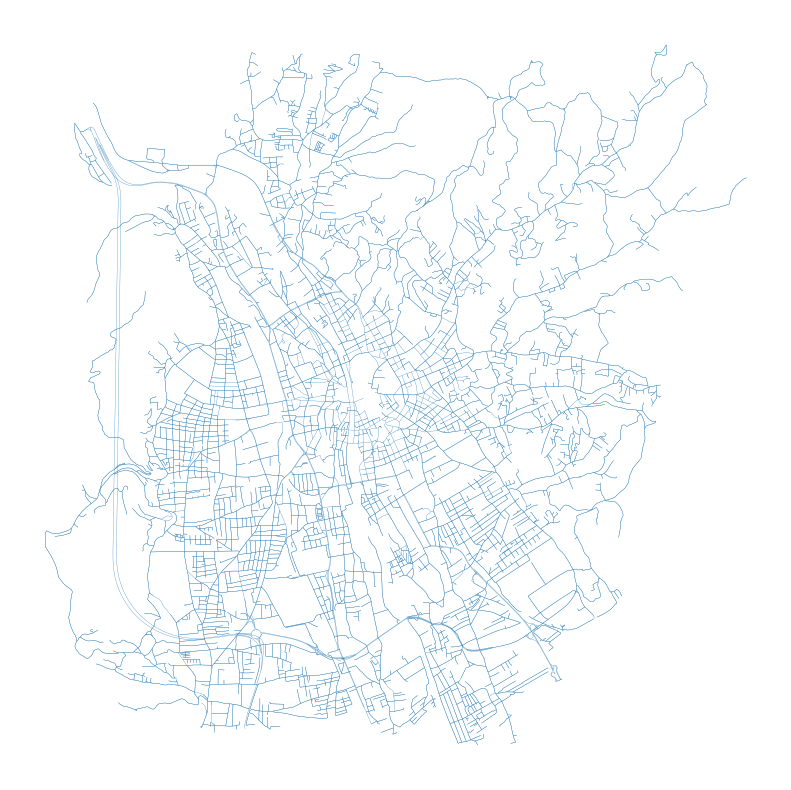

  0%|          | 0/4773 [00:00<?, ?it/s]

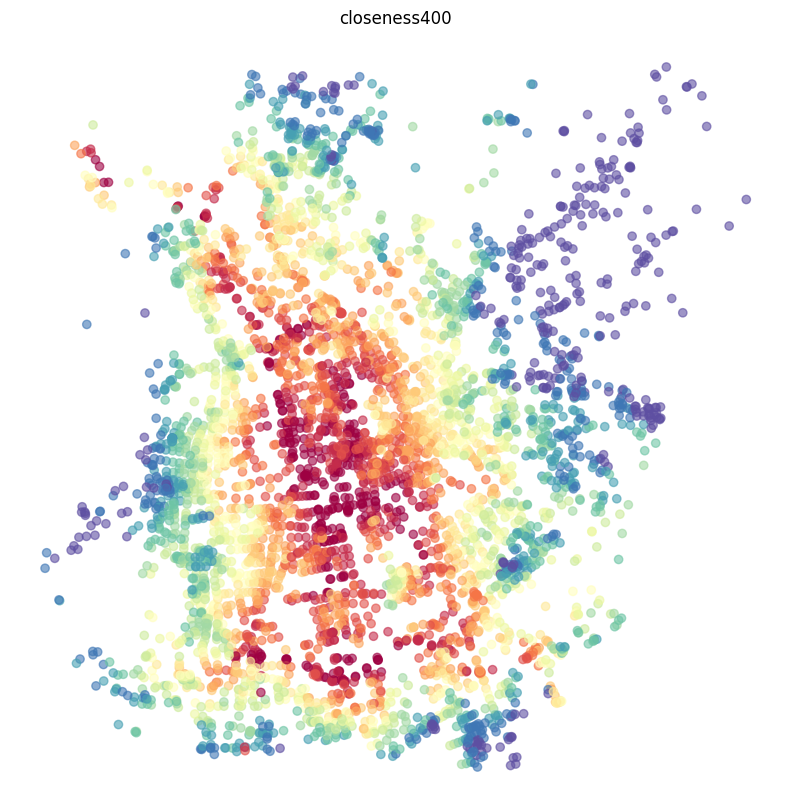

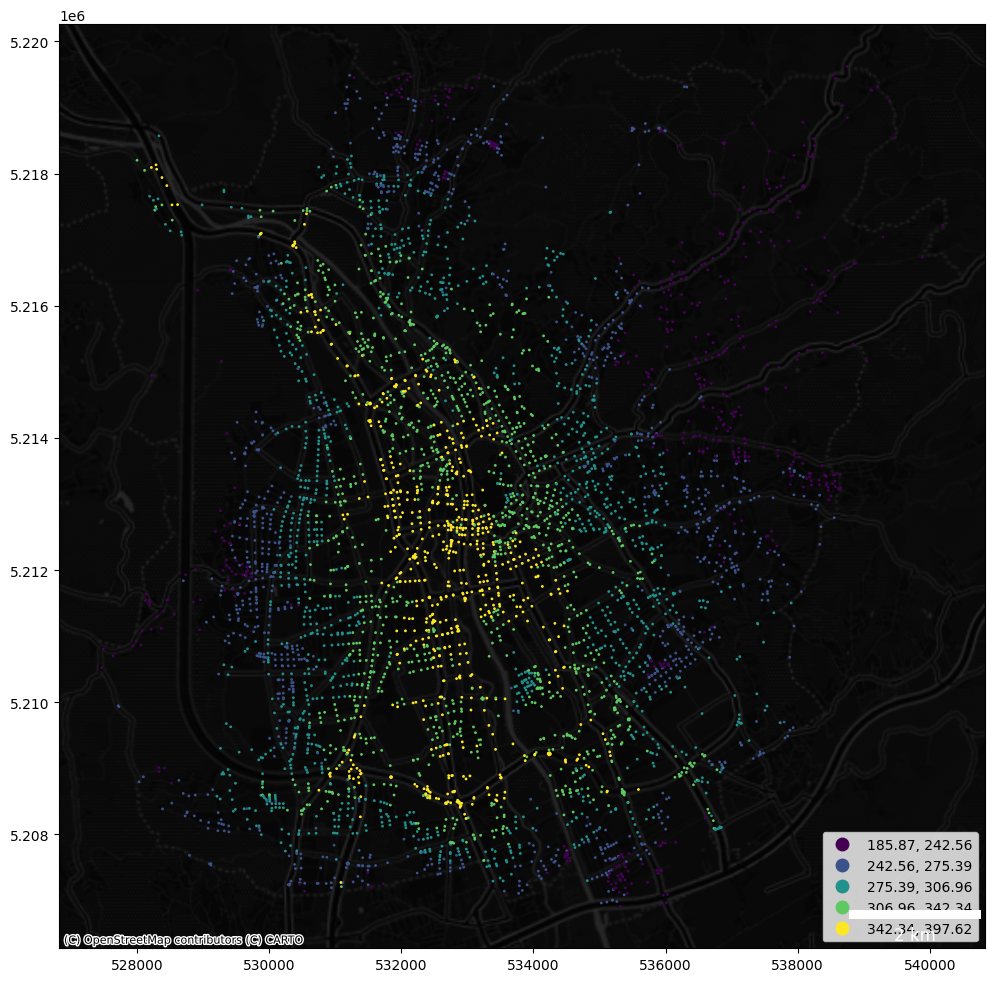

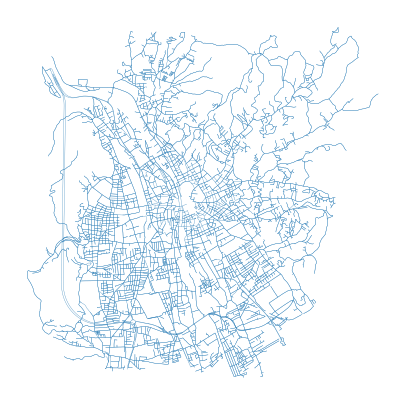

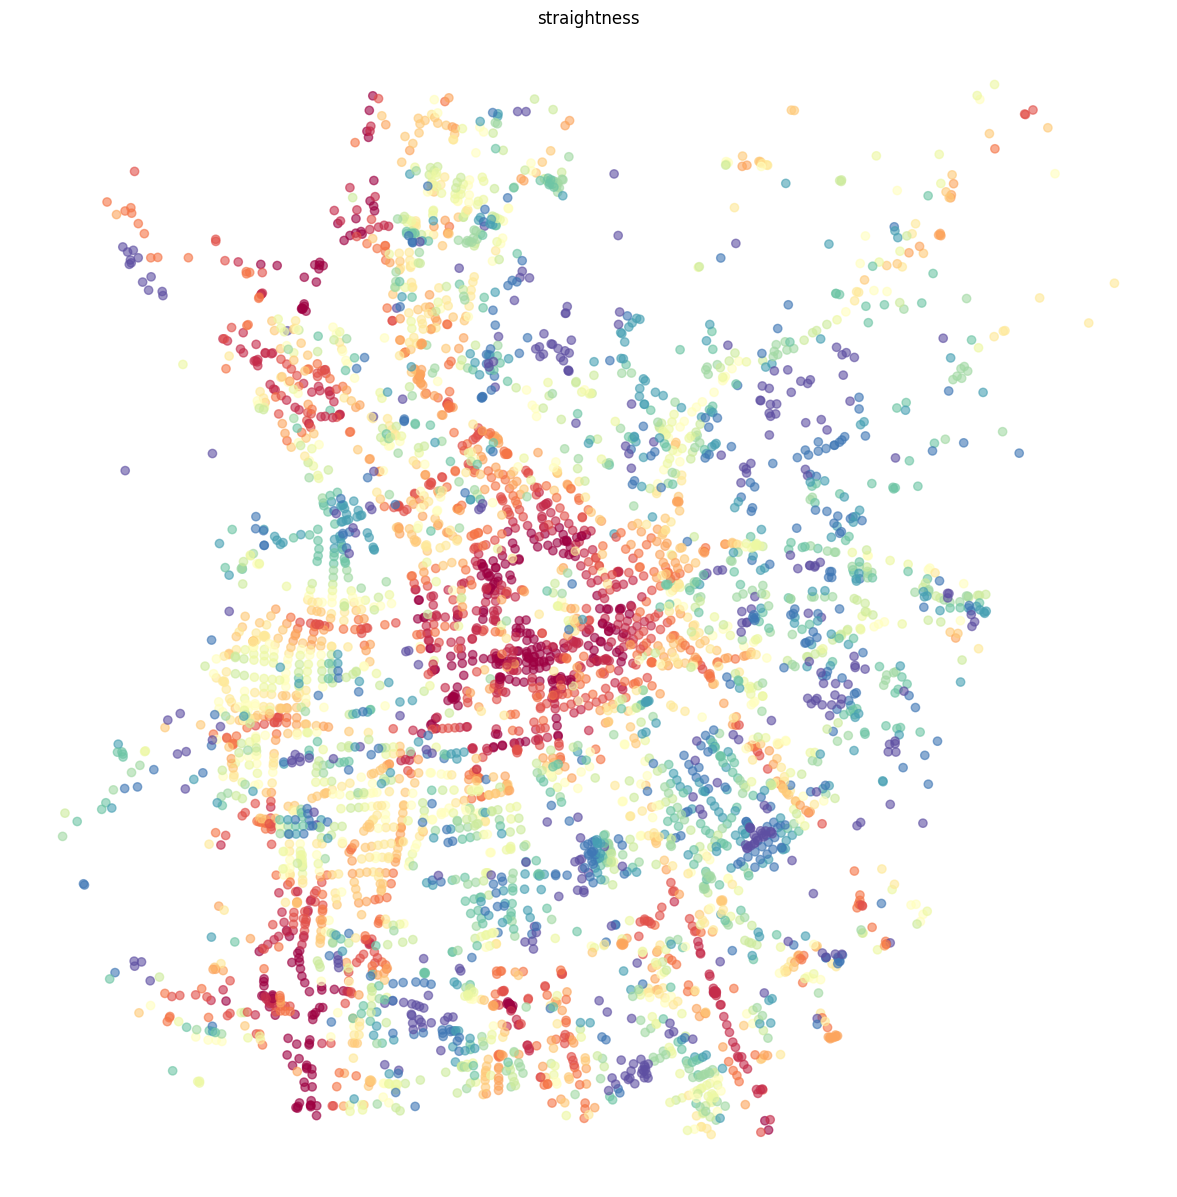

KeyError: 'Straightness'

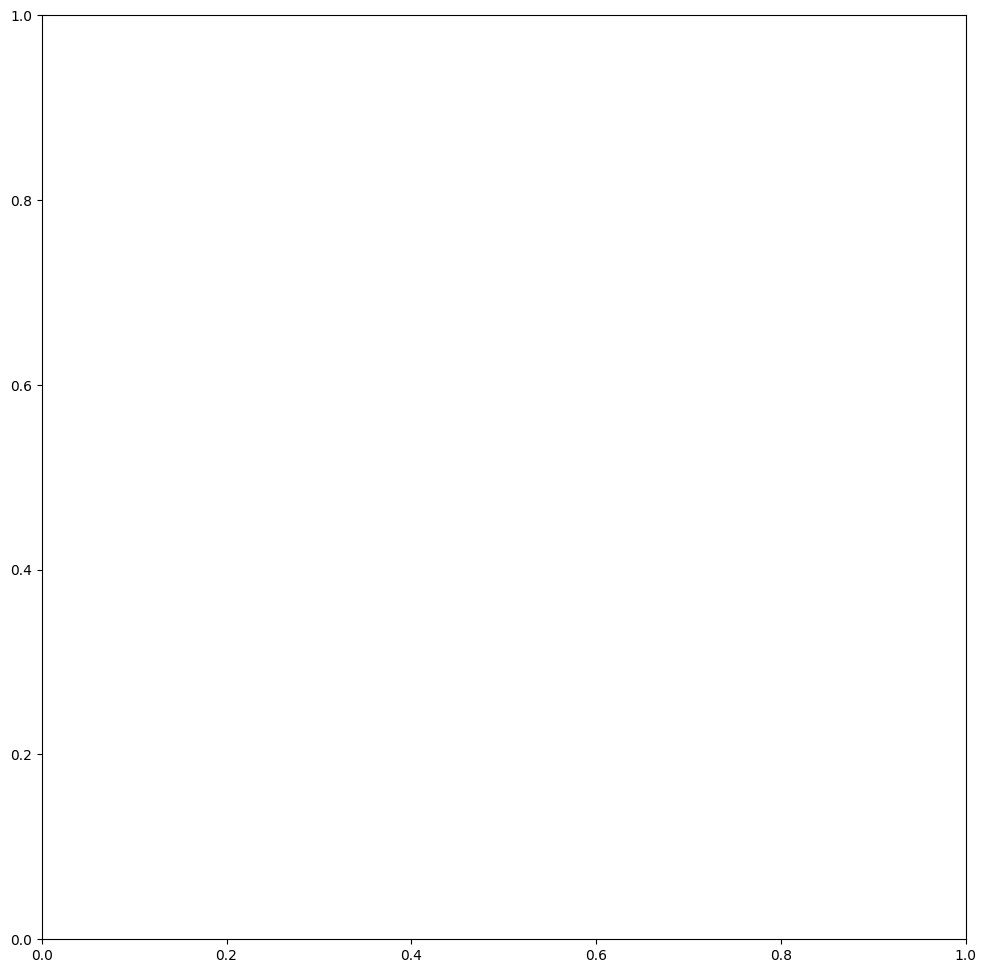

In [4]:
import momepy
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
import contextily
from matplotlib_scalebar.scalebar import ScaleBar
import mapclassify

# Urban Network Analysis using Python and Graph Theory

# In this script, we will analyze an urban network using Python and graph theory,
# which is a fundamental method in urban planning and design. We will use the NetworkX
# library to model the urban network as a graph, where intersections are nodes and streets are edges.
# The analysis will include calculating various centrality measures and visualizing the network.

# Fetching street network for Graz, Austria
streets_graph = ox.graph_from_place('Graz, Austria', network_type='drive')
street_graph = ox.project_graph(streets_graph)

# Convert the graph to GeoDataFrame
edges = ox.graph_to_gdfs(street_graph, nodes=False, edges=True,
                         node_geometry=False, fill_edge_geometry=True)

# Plotting the street network
f, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()
plt.show()

# Urban Network Analysis - Centrality Measures
primal = momepy.gdf_to_nx(edges, approach='primal')
primal = momepy.closeness_centrality(primal, radius=400, name='closeness400', distance='mm_Len', weight='mm_Len', legend=True)
nodes = momepy.nx_to_gdf(primal, lines=False)

nodes['closeness400'] = nodes['closeness400'].apply(lambda x: x*10000)

# Plotting centrality measure
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='closeness400', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('closeness400')
plt.show()

# Plot with basemap
ax = nodes.plot(
    "closeness400",
    scheme="fisherjenkssampled",
    markersize=1,
    legend=True,
    figsize=(12, 12),
)

contextily.add_basemap(
    ax,
    crs=nodes.crs,
    source=contextily.providers.CartoDB.DarkMatterNoLabels
)

scalebar = ScaleBar(
    1,
    box_alpha=0,
    location="lower right",
    color="white",
    length_fraction=0.25,
    font_properties={"size": 12},
)
ax.add_artist(scalebar)

### Straightness ####

# Straightness measure for the street network
streets_graph = ox.graph_from_place('Graz, Austria', network_type='drive')
streets_graph = ox.project_graph(streets_graph)
streets = ox.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                           node_geometry=False, fill_edge_geometry=True)

f, ax = plt.subplots(figsize=(5, 5))
streets.plot(ax=ax, linewidth=0.2)
ax.set_axis_off()

primal = momepy.gdf_to_nx(streets, approach='primal')
primal = momepy.straightness_centrality(primal)

nodes = momepy.nx_to_gdf(primal, lines=False)

f, ax = plt.subplots(figsize=(15, 15))
nodes.plot(ax=ax, column='straightness', cmap='Spectral_r', scheme='quantiles', k=15, alpha=0.6)
ax.set_axis_off()
ax.set_title('straightness')
plt.show()

ax = nodes.plot(
    "Straightness",
    scheme="fisherjenkssampled",
    markersize=0.5,
    legend=True,
    figsize=(12, 12),
)

contextily.add_basemap(
    ax,
    crs=nodes.crs,
    source=contextily.providers.CartoDB.DarkMatterNoLabels
)

scalebar = ScaleBar(
    1,
    box_alpha=0,
    location="lower right",
    color="white",
    length_fraction=0.25,
    font_properties={"size": 12},
)

ax.add_artist(scalebar)
